In [4]:
# import data
import pandas_datareader.data as web
import datetime as dt
df = web.DataReader('AAPL', 'yahoo', dt.datetime(2010, 1, 1), dt.datetime(2019,12,31))
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753


### Candlestick Chart

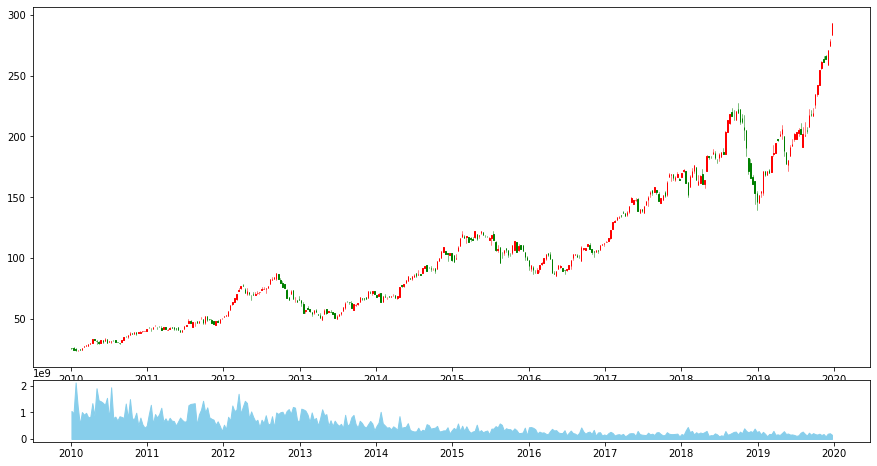

In [20]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

fig = plt.figure(figsize = (15,8))
f_ohlc = df['Adj Close'].resample('10D').ohlc()
f_ohlc.reset_index(inplace = True)
f_ohlc['Date'] = f_ohlc['Date'].map(mdates.date2num)
f_vol = df['Volume'].resample('10D').sum()
# location of ax1
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
# location of ax2
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)
# treat x valuse as date
ax1.xaxis_date()
# ax1
candlestick_ohlc(ax1, f_ohlc.values, width = 2, colorup = 'red', colordown = 'green')
# ax2
ax2.fill_between(f_vol.index.map(mdates.date2num), f_vol.values, 0, color = 'skyblue')


# Technical Index

In [8]:
import talib
df['RSI'] = talib.RSI(df.Close)

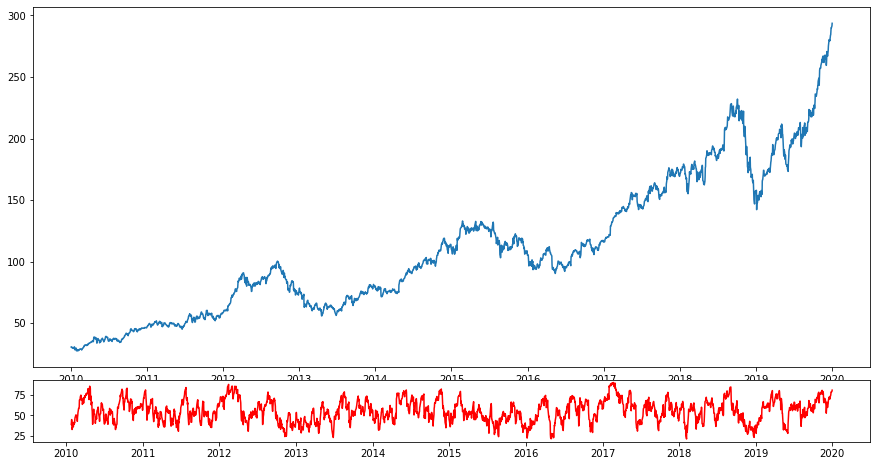

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,8))
ax = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax.plot(df.index, df['Close'])
ax.xaxis_date()
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)
ax2.plot(df.index,df['RSI'], color = 'r')